In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
movies_data = pd.read_csv(
    "data/movies.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["MovieID", "Title", "Genres"]
)

ratings_data = pd.read_csv(
    "data/ratings.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["UserID", "MovieID", "Rating", "Timestamp"]
)

users_data = pd.read_csv(
    "data/users.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"]
)

## Explore data

In [ ]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users_data.head()


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Check for Missing Value

In [7]:
movies_data.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
ratings_data.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [9]:
users_data.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

## Info

In [10]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [13]:
ratings_data['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [14]:
ratings_data['Rating'].value_counts().sort_index()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: count, dtype: int64

## User Data

In [15]:
users_data['Gender'].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

In [16]:
users_data['Age'].value_counts().sort_index()

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: count, dtype: int64

In [17]:
users_data['Occupation'].value_counts().sort_index()

Occupation
0     711
1     528
2     267
3     173
4     759
5     112
6     236
7     679
8      17
9      92
10    195
11    129
12    388
13    142
14    302
15    144
16    241
17    502
18     70
19     72
20    281
Name: count, dtype: int64

## Unique Genre and Top Rated Movies

In [ ]:
unique_genres = set()
for genre_list in movies_data['Genres']:
    for genre in genre_list.split('|'):
        unique_genres.add(genre)
print(sorted(unique_genres))

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [ ]:
most_rated = ratings_data['MovieID'].value_counts().head(10)

In [ ]:
movies_data[movies_data['MovieID'].isin(most_rated.index)]

,MovieID,Title,Genres
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi
585,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1250,1270,Back to the Future (1985),Comedy|Sci-Fi
1959,2028,Saving Private Ryan (1998),Action|Drama|War
2502,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2789,2858,American Beauty (1999),Comedy|Drama


In [ ]:
print("Unique users:", ratings_data['UserID'].nunique())
print("Unique movies:", ratings_data['MovieID'].nunique())

ratings_per_user = ratings_data.groupby('UserID').size()
print(ratings_per_user.describe())

Unique users: 6040


Unique movies: 3706
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64


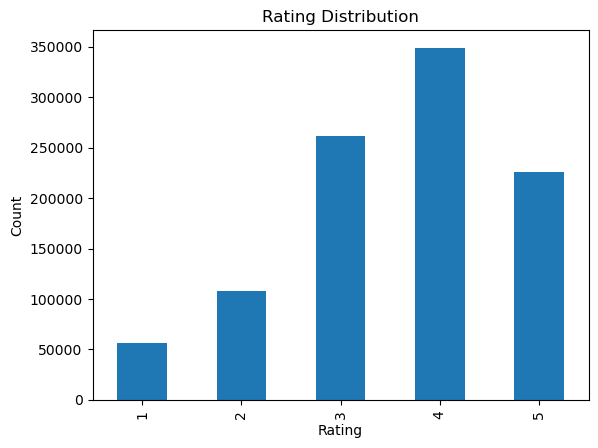

In [ ]:
ratings_data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

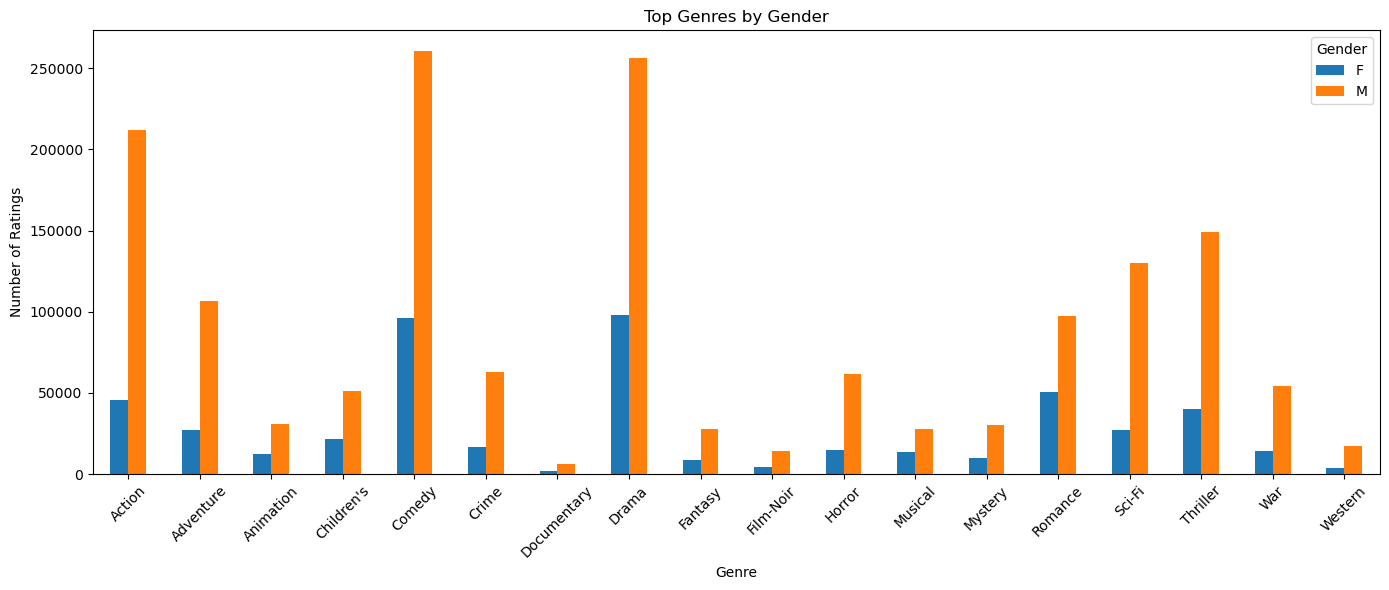

In [ ]:
merged = ratings_data.merge(users_data, on='UserID').merge(movies_data, on='MovieID')

merged['Genres'] = merged['Genres'].str.split('|')
exploded = merged.explode('Genres')

genre_gender = exploded.groupby(['Gender', 'Genres']).size().unstack(fill_value=0)

genre_gender.T.plot(kind='bar', figsize=(14,6))
plt.title("Top Genres by Gender")
plt.xlabel("Genre")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

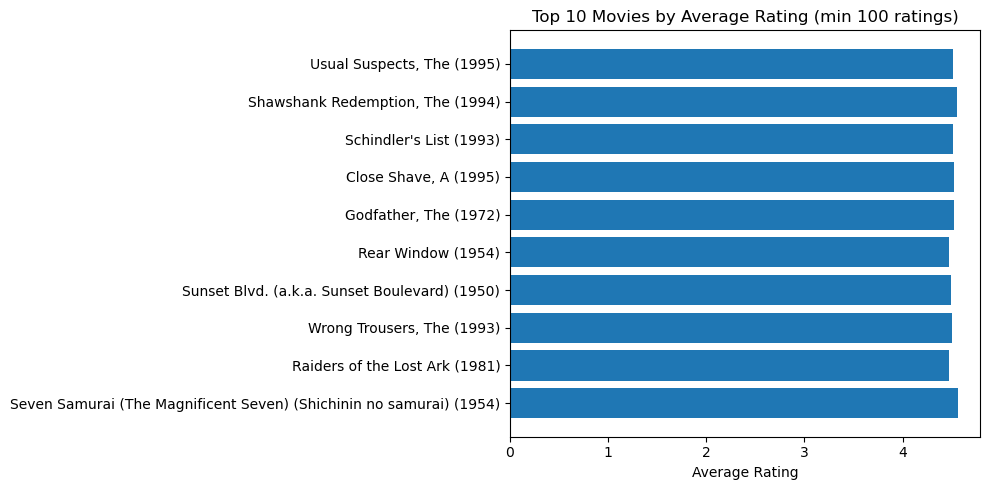

In [ ]:
min_ratings = 100

avg_ratings = ratings_data.groupby('MovieID')['Rating'].agg(['mean', 'count'])

popular = avg_ratings[avg_ratings['count'] >= min_ratings].sort_values(by='mean', ascending=False).head(10)

top_avg = movies_data.merge(popular, left_on='MovieID', right_index=True)

plt.figure(figsize=(10,5))
plt.barh(top_avg['Title'], top_avg['mean'])
plt.xlabel("Average Rating")
plt.title("Top 10 Movies by Average Rating (min 100 ratings)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

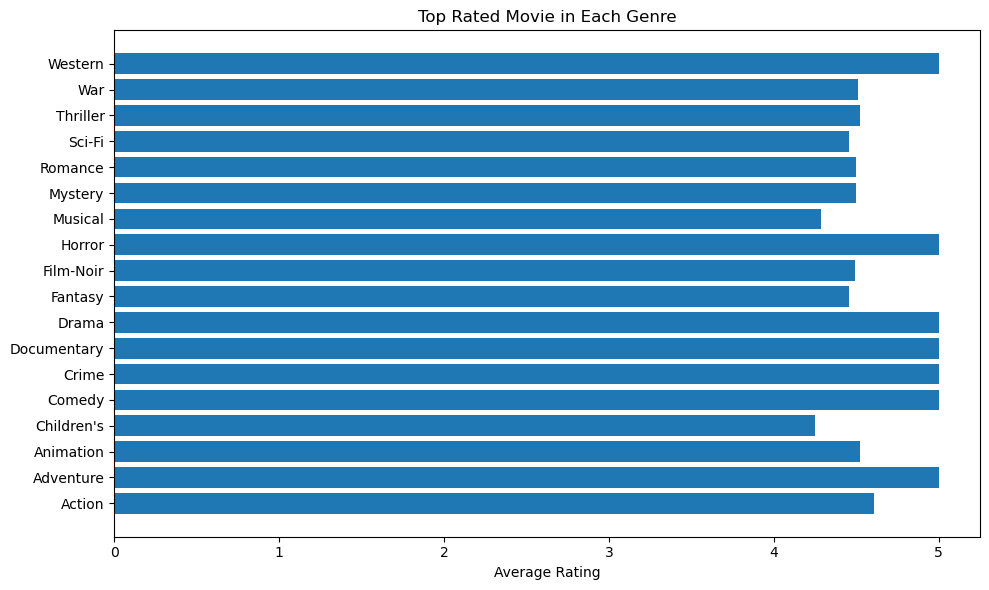

           Genres                                          Title    Rating
369        Action                                 Sanjuro (1962)  4.608696
761     Adventure                        Ulysses (Ulisse) (1954)  5.000000
801     Animation                          Close Shave, A (1995)  4.520548
1129   Children's                       Wizard of Oz, The (1939)  4.247963
1515       Comedy                        Follow the Bitch (1998)  5.000000
2409        Crime                                   Lured (1947)  5.000000
2510  Documentary                       Bittersweet Motel (2000)  5.000000
3587        Drama                       One Little Indian (1973)  5.000000
4154      Fantasy      Star Wars: Episode IV - A New Hope (1977)  4.453694
4203    Film-Noir  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)  4.491489
4237       Horror                               Baby, The (1973)  5.000000
4639      Musical                     Singin' in the Rain (1952)  4.283622
4705      Mystery        

In [ ]:
merged_movies = ratings_data.merge(movies_data, on='MovieID')
merged_movies['Genres'] = merged_movies['Genres'].str.split('|')
exploded_genres = merged_movies.explode('Genres')

genre_ratings = exploded_genres.groupby(['Genres', 'Title'])['Rating'].mean().reset_index()

top_per_genre = genre_ratings.sort_values(['Genres', 'Rating'], ascending=[True, False]).drop_duplicates('Genres')

plt.figure(figsize=(10,6))
plt.barh(top_per_genre['Genres'], top_per_genre['Rating'])
plt.xlabel("Average Rating")
plt.title("Top Rated Movie in Each Genre")
plt.tight_layout()
plt.show()

print(top_per_genre[['Genres', 'Title', 'Rating']])

## Modeling Recommendation System

In [26]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_data[['UserID', 'MovieID', 'Rating']], reader)

In [27]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from surprise import SVD
from surprise import accuracy

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.8738
RMSE: 0.873828646382939


In [ ]:
movie_id_to_title = dict(zip(movies_data['MovieID'], movies_data['Title']))

In [ ]:
def recommend_for_user(user_id, model, ratings_df, movie_df, n=10):
    watched_movie_ids = ratings_df[ratings_df['UserID'] == user_id]['MovieID'].tolist()
    all_movie_ids = movie_df['MovieID'].unique()
    
    movies_to_predict = [mid for mid in all_movie_ids if mid not in watched_movie_ids]

    predictions = [model.predict(user_id, mid) for mid in movies_to_predict]
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    top_movie_titles = [movie_id_to_title[p.iid] for p in top_predictions]
    return top_movie_titles

In [31]:
user_id = 1
recommend_for_user(user_id, model, ratings_data, movies_data)

['Shawshank Redemption, The (1994)',
 "It's a Wonderful Life (1946)",
 'Wrong Trousers, The (1993)',
 'Raiders of the Lost Ark (1981)',
 'Yojimbo (1961)',
 'Arsenic and Old Lace (1944)',
 'Silence of the Lambs, The (1991)',
 'October Sky (1999)',
 'Rear Window (1954)',
 'General, The (1927)']

In [ ]:
def recommend_for_user(user_id, model, ratings_df, movie_df, n=10):
    watched_movie_ids = ratings_df[ratings_df['UserID'] == user_id]['MovieID'].tolist()
    all_movie_ids = movie_df['MovieID'].unique()
    
    movies_to_predict = [mid for mid in all_movie_ids if mid not in watched_movie_ids]

    predictions = [model.predict(user_id, mid) for mid in movies_to_predict]
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    top_movie_titles = [movie_id_to_title[p.iid] for p in top_predictions]
    return top_movie_titles

In [33]:
recommendations = recommend_for_user(2, model, ratings_data, movies_data)
print("Top Recommendations for User 1:\n")
for idx, movie in enumerate(recommendations, 1):
    print(f"{idx}. {movie}")

Top Recommendations for User 1:

1. It's a Wonderful Life (1946)
2. Sound of Music, The (1965)
3. When Harry Met Sally... (1989)
4. Sting, The (1973)
5. Christmas Story, A (1983)
6. Wizard of Oz, The (1939)
7. Sanjuro (1962)
8. Philadelphia (1993)
9. Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
10. Sixth Sense, The (1999)


## Save the model

In [ ]:
import pickle

with open("model/svd_model.pkl", "wb") as f:
    pickle.dump(model, f)


## Content-Based Recommendation System

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

movies_data['Content'] = movies_data['Title'] + " " + movies_data['Genres']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_data['Content'])

print("TF-IDF Matrix shape:", tfidf_matrix.shape)

TF-IDF Matrix shape: (3883, 4369)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
title_to_index = pd.Series(movies_data.index, index=movies_data['Title']).drop_duplicates()

In [37]:
def recommend_similar_movies(title, cosine_sim=cosine_sim, top_n=10):
    if title not in title_to_index:
        return ["Movie not found."]
    
    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    return movies_data.iloc[movie_indices][['Title', 'Genres']]

recommend_similar_movies("Inception")

['Movie not found.']

In [ ]:
def recommend_based_on_liked(liked_titles, top_n=10):
    indices = [title_to_index[title] for title in liked_titles if title in title_to_index]

    sim_scores = cosine_sim[indices].mean(axis=0)
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    liked_indices = set(indices)
    filtered = [i for i in sim_scores if i[0] not in liked_indices][:top_n]

    movie_indices = [i[0] for i in filtered]
    return movies_data.iloc[movie_indices][['Title', 'Genres']]

liked = ["The Matrix", "Fight Club", "The Dark Knight"]
recommend_based_on_liked(liked)

C:\Users\jgdod\AppData\Local\Temp\ipykernel_17372\4127224143.py:4: RuntimeWarning: Mean of empty slice.
  sim_scores = cosine_sim[indices].mean(axis=0)
c:\Users\jgdod\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


,Title,Genres
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children's
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


In [39]:
def get_unwatched_movies(user_id, ratings_df, movie_df):
    watched = ratings_df[ratings_df['UserID'] == user_id]['MovieID'].tolist()
    all_movie_ids = movie_df['MovieID'].tolist()
    return [mid for mid in all_movie_ids if mid not in watched]

In [ ]:
def hybrid_recommend(user_id, model, liked_titles=None, top_n=10, alpha=0.7):
    unwatched = get_unwatched_movies(user_id, ratings_data, movies_data)

    cf_scores = []
    for mid in unwatched:
        pred = model.predict(user_id, mid)
        cf_scores.append((mid, pred.est))
    cf_scores = pd.DataFrame(cf_scores, columns=['MovieID', 'CF_Score'])

    if not liked_titles:
        top_cf = cf_scores.sort_values(by='CF_Score', ascending=False).head(top_n)
        return movies_data[movies_data['MovieID'].isin(top_cf['MovieID'])][['Title', 'Genres']]

    liked_indices = [title_to_index[title] for title in liked_titles if title in title_to_index]
    
    if not liked_indices:
        print("⚠️ None of the liked movies are found. Falling back to CF-only.")
        top_cf = cf_scores.sort_values(by='CF_Score', ascending=False).head(top_n)
        return movies_data[movies_data['MovieID'].isin(top_cf['MovieID'])][['Title', 'Genres']]

    content_scores = cosine_sim[liked_indices].mean(axis=0)
    content_scores = list(enumerate(content_scores))
    content_scores = pd.DataFrame(content_scores, columns=['Index', 'Content_Score'])
    content_scores['MovieID'] = movies_data.iloc[content_scores['Index']]['MovieID'].values

    hybrid = cf_scores.merge(content_scores[['MovieID', 'Content_Score']], on='MovieID')

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    hybrid[['CF_Score', 'Content_Score']] = scaler.fit_transform(hybrid[['CF_Score', 'Content_Score']])

    hybrid['Hybrid_Score'] = alpha * hybrid['CF_Score'] + (1 - alpha) * hybrid['Content_Score']

    top = hybrid.sort_values(by='Hybrid_Score', ascending=False).head(top_n)
    return movies_data[movies_data['MovieID'].isin(top['MovieID'])][['Title', 'Genres']]

In [41]:
recommendations = hybrid_recommend(user_id=1, model=model, liked_titles=None, top_n=10)
print(recommendations)

                                 Title                   Genres
315   Shawshank Redemption, The (1994)                    Drama
589   Silence of the Lambs, The (1991)           Drama|Thriller
892                 Rear Window (1954)         Mystery|Thriller
941       It's a Wonderful Life (1946)                    Drama
1132        Wrong Trousers, The (1993)         Animation|Comedy
1180    Raiders of the Lost Ark (1981)         Action|Adventure
1249       Arsenic and Old Lace (1944)  Comedy|Mystery|Thriller
2432                October Sky (1999)                    Drama
2953               General, The (1927)                   Comedy
2961                    Yojimbo (1961)     Comedy|Drama|Western
